# Music Genre Classification

## 4. Spectograms generation

<img src='music.jpg' width = 600>

<div class="alert alert-info"> <b> In this notebook we will produce spectograms images for all the audio files</b></div>

Serge Retkowsky | serge.retkowsky@microsoft.com | 02-Mar-2022 | V1

In [ ]:
#!pip install basic-image-eda

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import librosa, librosa.display, IPython.display as ipd
import numpy as np
import wave
from scipy.io import wavfile as wav
import os
import os.path, time
import seaborn
import glob
from datetime import datetime
import shutil
from pathlib import Path
import urllib.request
from zipfile import ZipFile

In [2]:
import sys
sys.version

'3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 19:07:31) \n[GCC 7.3.0]'

In [3]:
def createdir(mydir):
    path = Path(mydir)
    if path.is_dir():
        print("Directory", mydir, 'exists so we will use it.')
    else:
        os.mkdir(mydir)

In [35]:
def filedir(LOCALFILE):
    timefile1 = os.path.getmtime(LOCALFILE)
    timefile = time.ctime(timefile1)
    timefile = time.strptime(timefile)
    timestamp = time.strftime("%Y-%m-%d %H:%M:%S", timefile)
    file_size = os.path.getsize(LOCALFILE)
    file_size_mb = str(round(file_size/1024**2, 2))
    print(LOCALFILE, '|', timestamp, '|', file_size_mb, 'Mb')

In [23]:
def imagesEDA(data_dir, option):
    from basic_image_eda import BasicImageEDA
    
    if option == 'basic':
        BasicImageEDA.explore(data_dir) # Use this for basic Image EDA    
    
    if option == 'advanced':
        extensions = ['jpg']
        threads = 0
        dimension_plot = True
        channel_hist = True
        nonzero = False
        hw_division_factor = 1.0
        BasicImageEDA.explore(data_dir, extensions, threads, dimension_plot, channel_hist, nonzero, hw_division_factor)

In [26]:
print ('Today is', datetime.today())

Today is 2022-03-02 09:25:23.085120


## Generating all the spectograms

In [6]:
durationsecs = 30
hoplength = 512
samprate = 22050
nfft = 2048

In [7]:
def spectogram_batch(wavdir, resultdir):
    createdir(resultdir)
    for root, _, files in os.walk(wavdir):
        print("Directory", root, "has", len(files), "files.")
    from datetime import datetime
    start_time = datetime.now()
    print("\nCreating the spectograms for all the wav files from", wavdir)
    print("\nRunning...\n")
    
    wavfiles = [file for file in os.listdir(wavdir) if file.endswith(('wav'))]
    
    for wavfile in wavfiles:
        
        plt.figure(figsize=(15, 7))
        wavfile = wavdir + wavfile
        print("Processing", wavfile)
        y, sr = librosa.load(wavfile,  sr = None, mono = True, offset = 0.0, duration = durationsecs)
        plt.ioff()
        fig = plt.figure()
        
        mel_signal = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=hoplength, n_fft=nfft)
        spectrogram = np.abs(mel_signal)
        power_to_db = librosa.power_to_db(spectrogram, ref=np.max)
        librosa.display.specshow(power_to_db, sr=sr, x_axis='time', y_axis='mel', cmap='magma', hop_length=hoplength)

        plt.axis('off')
        filenamewithoutext = os.path.splitext(os.path.basename(wavfile))[0]
        savefilename = resultdir + '/' + str(filenamewithoutext) + '.jpg'
        plt.savefig(savefilename, dpi = 300)
        plt.close('all')
    
    print('\nDone!')
    end_time = datetime.now()
    print("Execution time:", (end_time-start_time))

In [8]:
createdir("spectogramsmusicgenres")

In [9]:
createdir("spectogramsmusicgenres/blues")
createdir("spectogramsmusicgenres/classical")
createdir("spectogramsmusicgenres/country")
createdir("spectogramsmusicgenres/disco")
createdir("spectogramsmusicgenres/hiphop")
createdir("spectogramsmusicgenres/jazz")
createdir("spectogramsmusicgenres/metal")
createdir("spectogramsmusicgenres/pop")
createdir("spectogramsmusicgenres/reggae")
createdir("spectogramsmusicgenres/rock")

## Running the spectograms

In [10]:
spectogram_batch("audiofiles/genres/blues/", "spectogramsmusicgenres/blues/")

Directory spectogramsmusicgenres/blues/ exists so we will use it.
Directory audiofiles/genres/blues/ has 100 files.

Creating the spectograms for all the wav files from audiofiles/genres/blues/

Running...

Processing audiofiles/genres/blues/blues.00000.wav
Processing audiofiles/genres/blues/blues.00001.wav
Processing audiofiles/genres/blues/blues.00002.wav
Processing audiofiles/genres/blues/blues.00003.wav
Processing audiofiles/genres/blues/blues.00004.wav
Processing audiofiles/genres/blues/blues.00005.wav
Processing audiofiles/genres/blues/blues.00006.wav
Processing audiofiles/genres/blues/blues.00007.wav
Processing audiofiles/genres/blues/blues.00008.wav
Processing audiofiles/genres/blues/blues.00009.wav
Processing audiofiles/genres/blues/blues.00010.wav
Processing audiofiles/genres/blues/blues.00011.wav
Processing audiofiles/genres/blues/blues.00012.wav
Processing audiofiles/genres/blues/blues.00013.wav
Processing audiofiles/genres/blues/blues.00014.wav
Processing audiofiles/genres

In [11]:
spectogram_batch("audiofiles/genres/classical/", "spectogramsmusicgenres/classical/")

Directory spectogramsmusicgenres/classical/ exists so we will use it.
Directory audiofiles/genres/classical/ has 100 files.

Creating the spectograms for all the wav files from audiofiles/genres/classical/

Running...

Processing audiofiles/genres/classical/classical.00000.wav
Processing audiofiles/genres/classical/classical.00001.wav
Processing audiofiles/genres/classical/classical.00002.wav
Processing audiofiles/genres/classical/classical.00003.wav
Processing audiofiles/genres/classical/classical.00004.wav
Processing audiofiles/genres/classical/classical.00005.wav
Processing audiofiles/genres/classical/classical.00006.wav
Processing audiofiles/genres/classical/classical.00007.wav
Processing audiofiles/genres/classical/classical.00008.wav
Processing audiofiles/genres/classical/classical.00009.wav
Processing audiofiles/genres/classical/classical.00010.wav
Processing audiofiles/genres/classical/classical.00011.wav
Processing audiofiles/genres/classical/classical.00012.wav
Processing aud

In [12]:
spectogram_batch("audiofiles/genres/country/", "spectogramsmusicgenres/country/")

Directory spectogramsmusicgenres/country/ exists so we will use it.
Directory audiofiles/genres/country/ has 100 files.

Creating the spectograms for all the wav files from audiofiles/genres/country/

Running...

Processing audiofiles/genres/country/country.00000.wav
Processing audiofiles/genres/country/country.00001.wav
Processing audiofiles/genres/country/country.00002.wav
Processing audiofiles/genres/country/country.00003.wav
Processing audiofiles/genres/country/country.00004.wav
Processing audiofiles/genres/country/country.00005.wav
Processing audiofiles/genres/country/country.00006.wav
Processing audiofiles/genres/country/country.00007.wav
Processing audiofiles/genres/country/country.00008.wav
Processing audiofiles/genres/country/country.00009.wav
Processing audiofiles/genres/country/country.00010.wav
Processing audiofiles/genres/country/country.00011.wav
Processing audiofiles/genres/country/country.00012.wav
Processing audiofiles/genres/country/country.00013.wav
Processing audiof

In [13]:
spectogram_batch("audiofiles/genres/disco/", "spectogramsmusicgenres/disco/")

Directory spectogramsmusicgenres/disco/ exists so we will use it.
Directory audiofiles/genres/disco/ has 100 files.

Creating the spectograms for all the wav files from audiofiles/genres/disco/

Running...

Processing audiofiles/genres/disco/disco.00000.wav
Processing audiofiles/genres/disco/disco.00001.wav
Processing audiofiles/genres/disco/disco.00002.wav
Processing audiofiles/genres/disco/disco.00003.wav
Processing audiofiles/genres/disco/disco.00004.wav
Processing audiofiles/genres/disco/disco.00005.wav
Processing audiofiles/genres/disco/disco.00006.wav
Processing audiofiles/genres/disco/disco.00007.wav
Processing audiofiles/genres/disco/disco.00008.wav
Processing audiofiles/genres/disco/disco.00009.wav
Processing audiofiles/genres/disco/disco.00010.wav
Processing audiofiles/genres/disco/disco.00011.wav
Processing audiofiles/genres/disco/disco.00012.wav
Processing audiofiles/genres/disco/disco.00013.wav
Processing audiofiles/genres/disco/disco.00014.wav
Processing audiofiles/genres

In [14]:
spectogram_batch("audiofiles/genres/hiphop/", "spectogramsmusicgenres/hiphop/")

Directory spectogramsmusicgenres/hiphop/ exists so we will use it.
Directory audiofiles/genres/hiphop/ has 100 files.

Creating the spectograms for all the wav files from audiofiles/genres/hiphop/

Running...

Processing audiofiles/genres/hiphop/hiphop.00000.wav
Processing audiofiles/genres/hiphop/hiphop.00001.wav
Processing audiofiles/genres/hiphop/hiphop.00002.wav
Processing audiofiles/genres/hiphop/hiphop.00003.wav
Processing audiofiles/genres/hiphop/hiphop.00004.wav
Processing audiofiles/genres/hiphop/hiphop.00005.wav
Processing audiofiles/genres/hiphop/hiphop.00006.wav
Processing audiofiles/genres/hiphop/hiphop.00007.wav
Processing audiofiles/genres/hiphop/hiphop.00008.wav
Processing audiofiles/genres/hiphop/hiphop.00009.wav
Processing audiofiles/genres/hiphop/hiphop.00010.wav
Processing audiofiles/genres/hiphop/hiphop.00011.wav
Processing audiofiles/genres/hiphop/hiphop.00012.wav
Processing audiofiles/genres/hiphop/hiphop.00013.wav
Processing audiofiles/genres/hiphop/hiphop.00014

In [15]:
spectogram_batch("audiofiles/genres/jazz/", "spectogramsmusicgenres/jazz/")

Directory spectogramsmusicgenres/jazz/ exists so we will use it.
Directory audiofiles/genres/jazz/ has 100 files.

Creating the spectograms for all the wav files from audiofiles/genres/jazz/

Running...

Processing audiofiles/genres/jazz/jazz.00000.wav
Processing audiofiles/genres/jazz/jazz.00001.wav
Processing audiofiles/genres/jazz/jazz.00002.wav
Processing audiofiles/genres/jazz/jazz.00003.wav
Processing audiofiles/genres/jazz/jazz.00004.wav
Processing audiofiles/genres/jazz/jazz.00005.wav
Processing audiofiles/genres/jazz/jazz.00006.wav
Processing audiofiles/genres/jazz/jazz.00007.wav
Processing audiofiles/genres/jazz/jazz.00008.wav
Processing audiofiles/genres/jazz/jazz.00009.wav
Processing audiofiles/genres/jazz/jazz.00010.wav
Processing audiofiles/genres/jazz/jazz.00011.wav
Processing audiofiles/genres/jazz/jazz.00012.wav
Processing audiofiles/genres/jazz/jazz.00013.wav
Processing audiofiles/genres/jazz/jazz.00014.wav
Processing audiofiles/genres/jazz/jazz.00015.wav
Processing a

In [16]:
spectogram_batch("audiofiles/genres/metal/", "spectogramsmusicgenres/metal/")

Directory spectogramsmusicgenres/metal/ exists so we will use it.
Directory audiofiles/genres/metal/ has 100 files.

Creating the spectograms for all the wav files from audiofiles/genres/metal/

Running...

Processing audiofiles/genres/metal/metal.00000.wav
Processing audiofiles/genres/metal/metal.00001.wav
Processing audiofiles/genres/metal/metal.00002.wav
Processing audiofiles/genres/metal/metal.00003.wav
Processing audiofiles/genres/metal/metal.00004.wav
Processing audiofiles/genres/metal/metal.00005.wav
Processing audiofiles/genres/metal/metal.00006.wav
Processing audiofiles/genres/metal/metal.00007.wav
Processing audiofiles/genres/metal/metal.00008.wav
Processing audiofiles/genres/metal/metal.00009.wav
Processing audiofiles/genres/metal/metal.00010.wav
Processing audiofiles/genres/metal/metal.00011.wav
Processing audiofiles/genres/metal/metal.00012.wav
Processing audiofiles/genres/metal/metal.00013.wav
Processing audiofiles/genres/metal/metal.00014.wav
Processing audiofiles/genres

In [17]:
spectogram_batch("audiofiles/genres/pop/", "spectogramsmusicgenres/pop/")

Directory spectogramsmusicgenres/pop/ exists so we will use it.
Directory audiofiles/genres/pop/ has 100 files.

Creating the spectograms for all the wav files from audiofiles/genres/pop/

Running...

Processing audiofiles/genres/pop/pop.00000.wav
Processing audiofiles/genres/pop/pop.00001.wav
Processing audiofiles/genres/pop/pop.00002.wav
Processing audiofiles/genres/pop/pop.00003.wav
Processing audiofiles/genres/pop/pop.00004.wav
Processing audiofiles/genres/pop/pop.00005.wav
Processing audiofiles/genres/pop/pop.00006.wav
Processing audiofiles/genres/pop/pop.00007.wav
Processing audiofiles/genres/pop/pop.00008.wav
Processing audiofiles/genres/pop/pop.00009.wav
Processing audiofiles/genres/pop/pop.00010.wav
Processing audiofiles/genres/pop/pop.00011.wav
Processing audiofiles/genres/pop/pop.00012.wav
Processing audiofiles/genres/pop/pop.00013.wav
Processing audiofiles/genres/pop/pop.00014.wav
Processing audiofiles/genres/pop/pop.00015.wav
Processing audiofiles/genres/pop/pop.00016.wav


In [18]:
spectogram_batch("audiofiles/genres/reggae/", "spectogramsmusicgenres/reggae/")

Directory spectogramsmusicgenres/reggae/ exists so we will use it.
Directory audiofiles/genres/reggae/ has 100 files.

Creating the spectograms for all the wav files from audiofiles/genres/reggae/

Running...

Processing audiofiles/genres/reggae/reggae.00000.wav
Processing audiofiles/genres/reggae/reggae.00001.wav
Processing audiofiles/genres/reggae/reggae.00002.wav
Processing audiofiles/genres/reggae/reggae.00003.wav
Processing audiofiles/genres/reggae/reggae.00004.wav
Processing audiofiles/genres/reggae/reggae.00005.wav
Processing audiofiles/genres/reggae/reggae.00006.wav
Processing audiofiles/genres/reggae/reggae.00007.wav
Processing audiofiles/genres/reggae/reggae.00008.wav
Processing audiofiles/genres/reggae/reggae.00009.wav
Processing audiofiles/genres/reggae/reggae.00010.wav
Processing audiofiles/genres/reggae/reggae.00011.wav
Processing audiofiles/genres/reggae/reggae.00012.wav
Processing audiofiles/genres/reggae/reggae.00013.wav
Processing audiofiles/genres/reggae/reggae.00014

In [19]:
spectogram_batch("audiofiles/genres/rock/", "spectogramsmusicgenres/rock/")

Directory spectogramsmusicgenres/rock/ exists so we will use it.
Directory audiofiles/genres/rock/ has 100 files.

Creating the spectograms for all the wav files from audiofiles/genres/rock/

Running...

Processing audiofiles/genres/rock/rock.00000.wav
Processing audiofiles/genres/rock/rock.00001.wav
Processing audiofiles/genres/rock/rock.00002.wav
Processing audiofiles/genres/rock/rock.00003.wav
Processing audiofiles/genres/rock/rock.00004.wav
Processing audiofiles/genres/rock/rock.00005.wav
Processing audiofiles/genres/rock/rock.00006.wav
Processing audiofiles/genres/rock/rock.00007.wav
Processing audiofiles/genres/rock/rock.00008.wav
Processing audiofiles/genres/rock/rock.00009.wav
Processing audiofiles/genres/rock/rock.00010.wav
Processing audiofiles/genres/rock/rock.00011.wav
Processing audiofiles/genres/rock/rock.00012.wav
Processing audiofiles/genres/rock/rock.00013.wav
Processing audiofiles/genres/rock/rock.00014.wav
Processing audiofiles/genres/rock/rock.00015.wav
Processing a

## Checking the number of generated files

In [20]:
for root, _, files in os.walk('spectogramsmusicgenres/'):
    print("Directory", root, "has", len(files), "spectogram jpg files.")

Directory spectogramsmusicgenres/ has 0 spectogram jpg files.
Directory spectogramsmusicgenres/blues has 100 spectogram jpg files.
Directory spectogramsmusicgenres/classical has 100 spectogram jpg files.
Directory spectogramsmusicgenres/country has 100 spectogram jpg files.
Directory spectogramsmusicgenres/disco has 100 spectogram jpg files.
Directory spectogramsmusicgenres/hiphop has 100 spectogram jpg files.
Directory spectogramsmusicgenres/jazz has 100 spectogram jpg files.
Directory spectogramsmusicgenres/metal has 100 spectogram jpg files.
Directory spectogramsmusicgenres/pop has 100 spectogram jpg files.
Directory spectogramsmusicgenres/reggae has 100 spectogram jpg files.
Directory spectogramsmusicgenres/rock has 100 spectogram jpg files.


## EDA On the images to check the shape of each spectograms

Text(0, 0.5, 'Number of Spectograms')

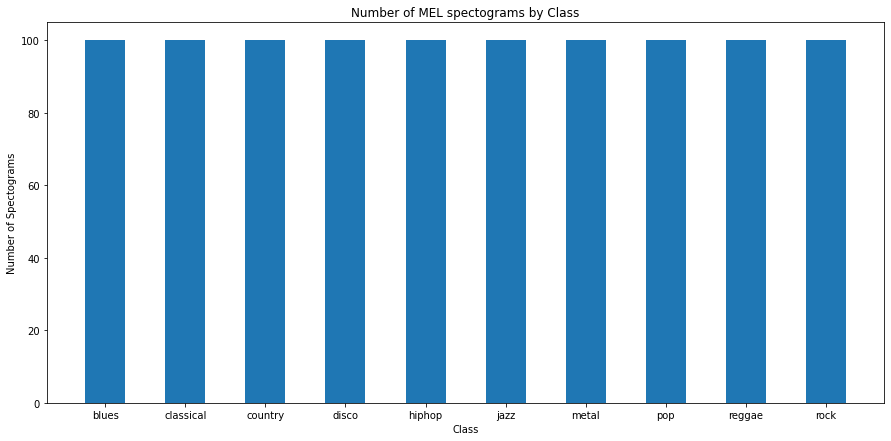

In [21]:
number_classes = { 'blues': len(os.listdir('spectogramsmusicgenres/blues')),
                   'classical': len(os.listdir('spectogramsmusicgenres/classical')),
                   'country': len(os.listdir('spectogramsmusicgenres/country')),
                   'disco': len(os.listdir('spectogramsmusicgenres/disco')),
                   'hiphop': len(os.listdir('spectogramsmusicgenres/hiphop')),
                   'jazz': len(os.listdir('spectogramsmusicgenres/jazz')),
                   'metal': len(os.listdir('spectogramsmusicgenres/metal')),
                   'pop': len(os.listdir('spectogramsmusicgenres/pop')),
                   'reggae': len(os.listdir('spectogramsmusicgenres/reggae')),
                   'rock': len(os.listdir('spectogramsmusicgenres/rock')),
                 }

plt.figure(figsize=(15, 7))
plt.bar(number_classes.keys(), number_classes.values(), width = .5)

plt.title("Number of MEL spectograms by Class")
plt.xlabel('Class')
plt.ylabel('Number of Spectograms')

In [30]:
imagesEDA("./spectogramsmusicgenres",  "basic")


found 1000 images.
Using 4 threads. (max:4)



100%|██████████| 1000/1000 [00:49<00:00, 20.12it/s]


*--------------------------------------------------------------------------------------*
number of images                         |  1000

dtype                                    |  uint8
channels                                 |  [3]
extensions                               |  ['jpg']

min height                               |  1200
max height                               |  1200
mean height                              |  1200.0
median height                            |  1200

min width                                |  1800
max width                                |  1800
mean width                               |  1800.0
median width                             |  1800

mean height/width ratio                  |  0.6666666666666666
median height/width ratio                |  0.6666666666666666
recommended input size(by mean)          |  [1200 1800] (h x w, multiples of 8)
recommended input size(by mean)          |  [1200 1792] (h x w, multiples of 16)
recommended input size(b

## Zipping the spectogram files

In [31]:
createdir("zip")

In [33]:
t1 = datetime.now()
print(t1, "Zipping all the spectograms images...")
shutil.make_archive("zip/spectograms", 'zip', "spectogramsmusicgenres/")
print("\nDone in:", datetime.now() - t1)

2022-03-02 09:28:12.090336 Zipping all the spectograms images...

Done in: 0:01:16.102946


In [36]:
filedir("zip/spectograms.zip")

zip/spectograms.zip | 2022-03-02 09:29:28 | 538.74 Mb


In [37]:
from IPython.display import FileLink
LINK = FileLink(path='zip/spectograms.zip')
print("Click to download the zip file:")
LINK

Click to download the zip file:


/mnt/batch/tasks/shared/LS_root/mounts/clusters/seretkow9/code/Users/seretkow/Sound/MusicGenreClassification/zip/spectograms.zip

We can use these files with Azure Custom Vision to build an image classification model.
We will use AutoML for Images in the next notebook to build, train and deploy a classification model.
If you want to use a nocode user interface then you can use Azure Custom Vision

> End of this notebook. You can use the next notebook.